In [1]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
import warnings
# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号，本代码是不完全
# 代码，之后还会进行更新，另外如果本代码出现问题或其他优化思路，也会在答疑群进行更新！

In [2]:
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 

# 黄金预测参数的选择

In [3]:
df = pd.read_excel('表.xlsx',index_col=0)
df.head()

,Date,USD (PM),Value,DealDay,黄金涨幅,比特币涨幅,黄金15日均价,黄金15日乖离率,比特币5日均价,比特币5日乖离率,...,预计比特币涨幅,预计现金持有份额,预计总资产,预计总资产变化率,黄金牛市,gold_cow,比特币牛市,bt_cow,黄金购买风险,比特币购买风险
0,2016-09-11,0.00,621.65,0,0.566145,0.510080,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.494444,-1,0.516667,1,0.51965,0.527381
1,2016-09-12,1324.60,609.67,1,0.566145,0.509356,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.488889,-2,0.533333,2,0.51595,0.538481
2,2016-09-13,1323.65,610.92,1,0.561015,0.510146,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.483333,-3,0.550000,3,0.51225,0.549581
3,2016-09-14,1321.75,608.82,1,0.555886,0.509949,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.477778,-4,0.566667,4,0.50855,0.560681
4,2016-09-15,1310.80,610.38,1,0.507019,0.510146,0.0,0.571622,0.009834,0.545356,...,0,0,0,0,0.472222,-5,0.583333,5,0.50485,0.570104


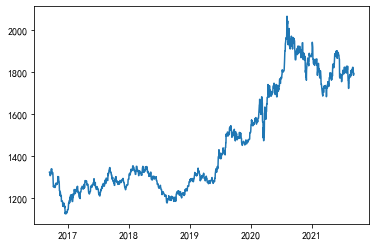

In [10]:
plt.plot(df['Date'][1:],df['USD (PM)'][1:])
plt.savefig('黄金走势图.png')
plt.show()

In [4]:
data = df['USD (PM)'][df['DealDay']==1].copy()
# data = df['USD (PM)'][1:].copy()
data_diff=data
data_diff.index=df['Date'][df['DealDay']==1].copy()
# data_diff.index=df['Date'][1:].copy()
data_diff=data_diff.diff(1).dropna()
diff_df = pd.DataFrame()
diff_df['diff_1'] =  data_diff
diff_df['diff_2'] = data_diff.diff(1).dropna()
diff_df['diff_3'] = diff_df['diff_2'].diff(1).dropna()

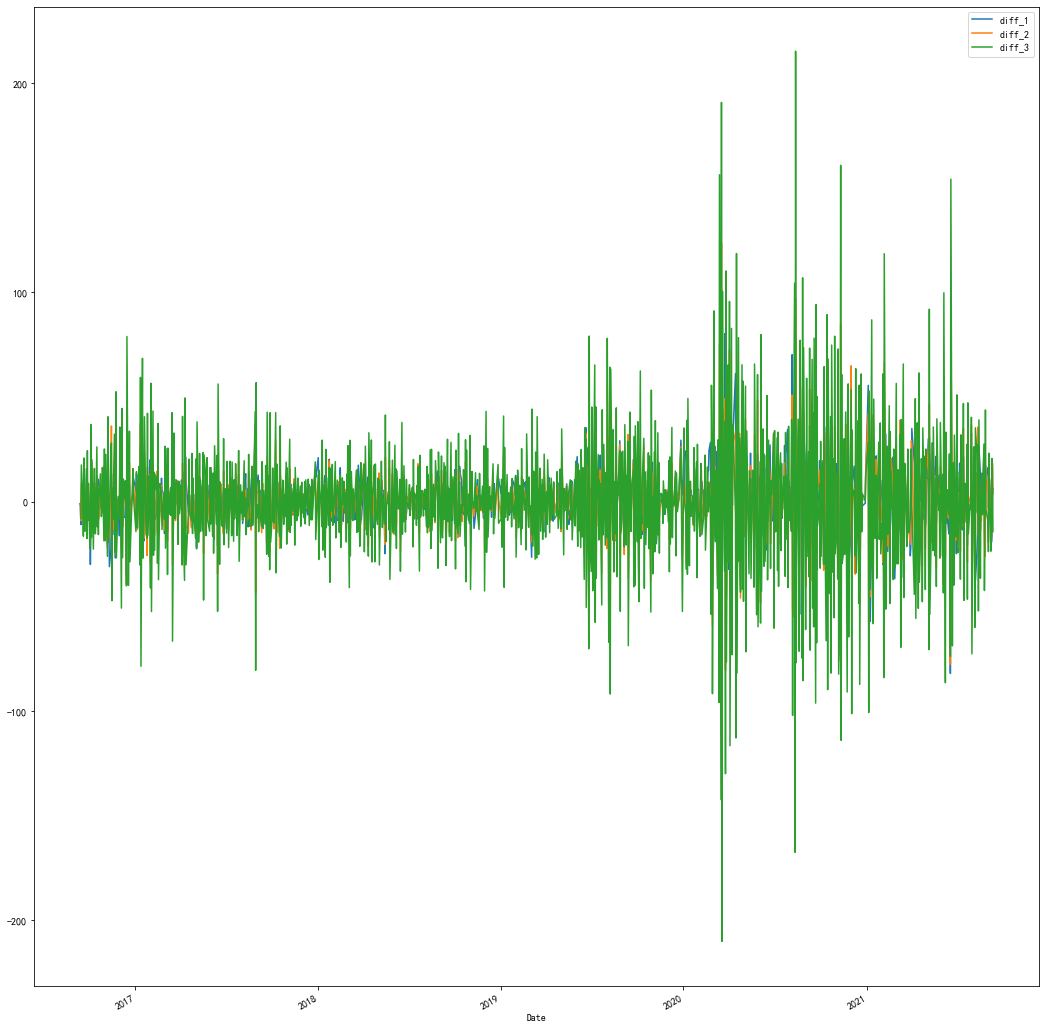

In [5]:
diff_df.plot(subplots=False,figsize=(18,20))
plt.savefig('黄金差分对比图.png')
plt.show()
# 对比选择几阶差分,肉眼观察数据平稳性

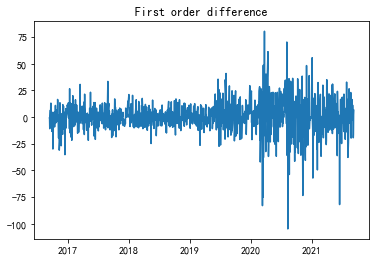

In [10]:
plt.plot(data_diff)
plt.title('First order difference')
plt.savefig('黄金一节差分图.png')
plt.show()

adfuller单位根检验数据平稳性  
输出结果中：  
第一个是adt检验的结果，简称为T值，表示t统计量。  
第二个简称为p值，表示t统计量对应的概率值。  
第三个表示延迟。  
第四个表示测试的次数。  
第五个是配合第一个一起看的，是在99%，95%，90%置信区间下的临界的ADF检验的值。  

第一点，1%、5%、10%不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设。  
第二点，p值要求小于给定的显著水平，p值要小于0.05，等于0是最好的。
ADF检验的原假设是存在单位根，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。注意，ADF值一般是负的，也有正的，但是它只有小于1%水平下的才能认为是及其显著的拒绝原假设。  
（原假设为不是平稳时间序列)

In [11]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(data))  # 原始数据
print(adfuller(diff_df['diff_1'].dropna()))  # 一阶差分
print(adfuller(diff_df['diff_2'].dropna()))  # 二阶差分
print(adfuller(diff_df['diff_3'].dropna()))  # 三阶差分

(-0.43415247222844333, 0.904238481294166, 23, 1231, {'1%': -3.435673305025808, '5%': -2.863890744031555, '10%': -2.56802156936202}, 9957.827619599739)
(-8.158681091879222, 9.269711421537366e-13, 22, 1231, {'1%': -3.435673305025808, '5%': -2.863890744031555, '10%': -2.56802156936202}, 9948.53365765105)
(-12.876776886967345, 4.750971956330957e-24, 23, 1229, {'1%': -3.4356819860439574, '5%': -2.863894574114006, '10%': -2.568023609111511}, 9993.29712959746)
(-15.44354192899608, 2.8443744636733058e-28, 23, 1228, {'1%': -3.4356863371792095, '5%': -2.8638964938393667, '10%': -2.568024631481501}, 10131.546643110893)


原始数据的P值>0.05所以不满足平稳性要求  
一阶差分的P值<0.05，且T值小于1%，5%，10%下的统计值，可以极显著的拒绝原假设，说明数据是平稳的。  
一阶差分数据已经平稳就无需继续做二阶差分了。  

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(data_diff, lags = 20)

,lb_stat,lb_pvalue
1,0.638353,0.424308
2,3.176220,0.204311
3,3.619850,0.305547
4,22.553612,0.000155
5,25.136239,0.000131
6,34.628430,0.000005
7,39.559513,0.000002
8,40.411537,0.000003
9,41.467390,0.000004
10,42.358208,0.000006


acorr_ljungbox输出结果的第二项为基于卡方分布的p统计量，一阶差分的P值都很小，所以该数据拒绝原假设，即认为该数据不是纯随机数据  
不是纯随机数才可以做时间序列分析

# 观察法选择p,q
|模型|ACF|PACF|
|-|-|-|
|AR(p)|衰减趋于零(几何型或振荡型)|p阶后截尾|
|MA(q)|q阶后截尾|衰减趋于零(几何型或振荡型)|
|ARMA(p,q)|q阶后衰减趋于零(几何型或振荡型)|p阶后衰减趋于零(几何型或振荡型)|

截尾:落在置信区间内( 95%的点都符合该规则)

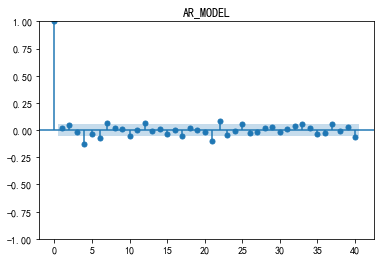

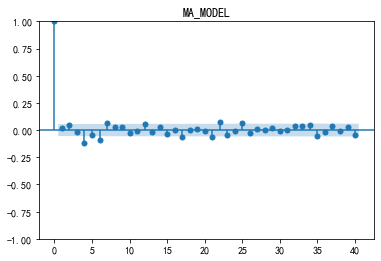

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(data_diff, lags=40)
plt.title('AR_MODEL')
plt.savefig('AR图.png')
pacf.show()
acf = plot_acf(data_diff, lags=40)
plt.title('MA_MODEL')
plt.savefig('MA图.png')
acf.show()

# 穷举法选择最好的p,q
max_ar和max_ma为最大可取参数，数值较大时运行结果较长。建议为5

In [11]:
import statsmodels.tsa.stattools as st
model = st.arma_order_select_ic(data_diff, max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
model.bic_min_order 
# 结果为(p,q)

(0, 0)

训练ARIMA模型  
order参数里的三个值分别为（p,d阶差分,q）  
对于使用穷举法得出结果为0,0,且绘制出的图形效果较差时，可以根据肉眼观察图主动选择

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(4,1,4))
result = model.fit()


残差检验  
如果残差是白噪声序列，说明时间序列中有用的信息已经被提取完毕了，剩下的全是随机扰动，是无法预测和使用的。  
qq图中：如果是正态分布则为一条直线，即红线。结果大致符合白噪声

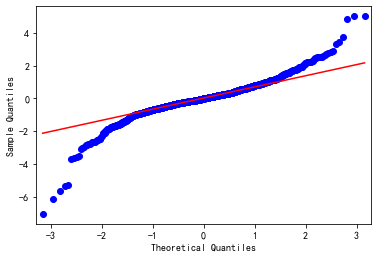

In [13]:
resid = result.resid
from statsmodels.graphics.api import qqplot
qqplot(resid, line='q', fit=True)
plt.savefig('黄金arima残差QQ图.png')
plt.show()

Durbin-Watson 检验，又称 DW 检验，是用来检验回归分析中残差的一阶自相关性的(尤其针对时间序列数据)。  
该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性

In [14]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(resid.values))

2.0179203733750732


In [15]:
# result.summary()

预测  
predict(起始时间，终止时间)，预测出的结果也为一阶差分，即黄金的涨幅

In [16]:
pred = result.predict('2016-09-20','2021-9-10')
# pred = result.predict(1,1655)
print(len(pred))
print(pred[-10:])

1249
Date
2021-08-27   -2.362076
2021-08-31    1.076209
2021-09-01    1.893747
2021-09-02    0.772796
2021-09-03   -0.271488
2021-09-06   -1.351984
2021-09-07    0.762884
2021-09-08   -1.925130
2021-09-09   -1.175594
2021-09-10    0.383579
dtype: float64


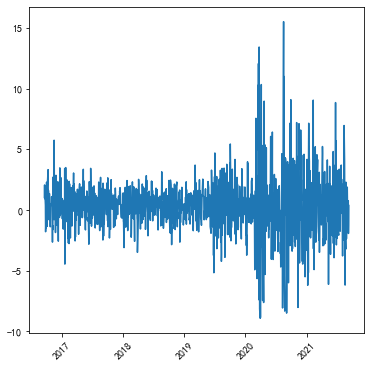

In [17]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
# plt.plot(data_diff)
plt.plot(pred)
plt.savefig('黄金预测涨幅.png')
plt.show()

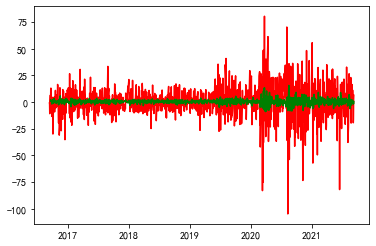

In [18]:
plt.plot(data_diff,c='r')
plt.plot(pred,c='g')
plt.savefig('黄金涨幅对比图.png')
plt.show()

虽然大幅涨势没有预测出来但是整体的峰值基本还是预测出来了。  
这里仅介绍了参数的选择，比特币同理，后续使用预测时不进行解释。这里预测结果仅为示意图，后续不需要使用，每一个使用的数据都是刚预测出来的。

In [19]:
# data = df['Value'].copy()
# data_diff=data
# data_diff.index=df['Date'].copy()
# data_diff=data_diff.diff().dropna()
# model = st.arma_order_select_ic(data_diff, max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
# model.bic_min_order 

# model = ARIMA(data, order=(2,1,2))
# result = model.fit()
# pred = result.predict(2,1836)
# print(len(pred))
# print(pred[-10:])
# result_fina = np.array(pred[0:-10]) + (np.array(df['Value'].shift(1)[:-1]))